In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# for pretty printing pandas dataframes
from IPython.display import display, HTML

# matplotlib
%matplotlib inline
plt.style.use('seaborn-notebook')

## Data Preprocessing


In [2]:
df = pd.read_csv('Boston.csv')

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [6]:
# normal the data
from sklearn.preprocessing import MinMaxScaler

# initize a scaler
scaler_X = MinMaxScaler()

# fit and transform
X_scaled = scaler_X.fit_transform(X)


In [7]:
# split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=0)

## Test Implementation

### Subgradient descent

Time to fit and predict: 0.2637007236480713
MSE: 30.7626057144 
 R2: 0.618434758798


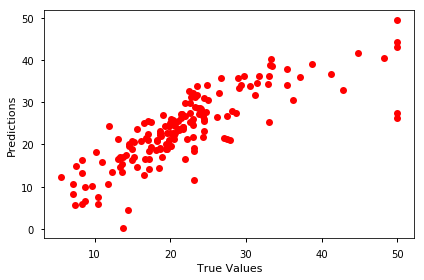

iterations: 4069
The best coeff: [-11.01436821   5.06123874   0.09410895   2.81071481  -8.27896286
  21.65591101  -1.06473195 -17.97243152   6.0446398   -6.04668245
 -10.64372861   3.01733436 -20.25679964]


In [15]:
from weighted_elastic_net import WEN
from sklearn.metrics import mean_squared_error as mse

import time

start_t = time.time()

# With indentity matrix as the weight
net1 = WEN(step_size = 5e-4, max_iter = 10000, 
           l1 = 0.1, l2 = 0.1, tol= 1e-3, 
           method = 'subgradient_descent')
net1.fit(X_train, y_train)
y_predict_1 = net1.predict(X_test)
print('Time to fit and predict:', time.time()- start_t)

# calcualte the score
MSE_1 = mse(y_test,y_predict_1)
R2_1 = net1.score(X_test, y_test)
print('MSE:', MSE_1, '\n', 'R2:', R2_1)

# plot the results
plot_dims = (6, 4)
fig, ax = plt.subplots(figsize=plot_dims)
plt.plot(y_test, y_predict_1, 'ro')
ax.set_ylabel('Predictions')
ax.set_xlabel('True Values')
plt.tight_layout()
plt.show() 
plt.close()

# print the number of iterations and the best coeff found
print('iterations:', net1._n_iter)
print('The best coeff:', net1._best_coeff)

### Coordinate descent

Time to fit and predict: 0.4983255863189697
MSE: 30.7696778605 
 R2: 0.618347039144


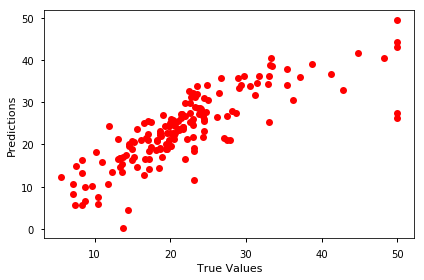

iterations: 8150
The best coeff: [-11.00027397   5.06286672   0.06681418   2.81076761  -8.28311748
  21.59209398  -1.06001454 -17.99831107   6.03215235  -6.02694445
 -10.64600072   3.00344376 -20.29056949]


In [16]:
start_t = time.time()

# With indentity matrix as the weight
net1 = WEN(step_size = 1e-4, max_iter = 10000, 
           l1 = 0.1, l2 = 0.1, tol= 1e-3, 
           method = 'coordinate_descent')
net1.fit(X_train, y_train)
y_predict_1 = net1.predict(X_test)
print('Time to fit and predict:', time.time()- start_t)

# calcualte the score
MSE_1 = mse(y_test,y_predict_1)
R2_1 = net1.score(X_test, y_test)
print('MSE:', MSE_1, '\n', 'R2:', R2_1)

# plot the results
plot_dims = (6, 4)
fig, ax = plt.subplots(figsize=plot_dims)
plt.plot(y_test, y_predict_1, 'ro')
ax.set_ylabel('Predictions')
ax.set_xlabel('True Values')
plt.tight_layout()
plt.show() 
plt.close()

# print the number of iterations and the best coeff found
print('iterations:', net1._n_iter)
print('The best coeff:', net1._best_coeff)

MSE: 68.8106622043 
 R2: 0.146504130209


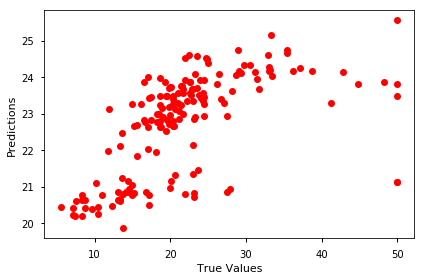

[-0.          0.33979773 -0.80416429  0.         -0.37171964  0.59200041
 -0.52021113  0.         -0.8922621  -1.11485764 -1.05374385  0.02799242
 -1.26768277]


In [14]:
from sklearn.linear_model import ElasticNet

regr = ElasticNet(random_state=0, fit_intercept=True)
regr.fit(X_train, y_train)
y_predict_regr = regr.predict(X_test)
R2_regr = regr.score(X_test, y_test)
MSE_regr = mse(y_test, y_predict_regr)

print('MSE:', MSE_regr, '\n', 'R2:', R2_regr)

# plot the results
plot_dims = (6, 4)
fig, ax = plt.subplots(figsize=plot_dims)
plt.plot(y_test, y_predict_regr, 'ro')
ax.set_ylabel('Predictions')
ax.set_xlabel('True Values')
plt.tight_layout()
plt.show() 
plt.close()

print(regr.coef_)

## Weighted Net

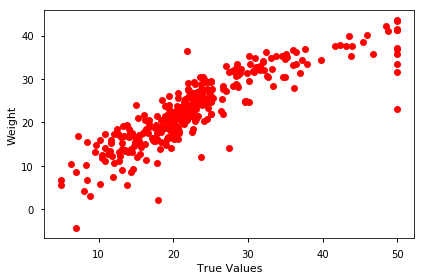

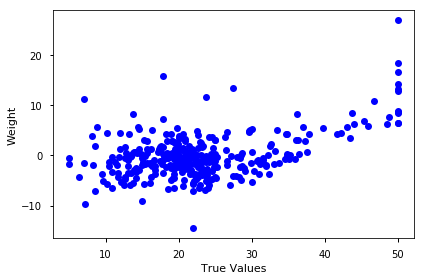

In [18]:
from sklearn.linear_model import LinearRegression

# calculate the weight
reg = LinearRegression()
reg.fit(X_train, y_train)
y_predict_reg = reg.predict(X_train)

# plot the results
plot_dims = (6, 4)
fig, ax = plt.subplots(figsize=plot_dims)
plt.plot(y_train, y_predict_reg, 'ro')
ax.set_ylabel('Weight')
ax.set_xlabel('True Values')
plt.tight_layout()
plt.show() 
plt.close()

# plot the results
plot_dims = (6, 4)
fig, ax = plt.subplots(figsize=plot_dims)
plt.plot(y_train, y_train - y_predict_reg, 'bo')
ax.set_ylabel('Weight')
ax.set_xlabel('True Values')
plt.tight_layout()
plt.show() 
plt.close()

Time to fit and predict: 1.201216697692871
MSE: 30.8283252781 
 R2: 0.617619603496


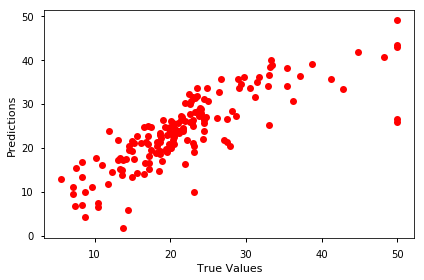

iterations: 20001
The best coeff: [-13.70919455   4.62278952  -0.3814157    2.32421547  -8.06479708
  23.18921098  -2.43595571 -18.75888617   7.0876967   -6.84606346
 -10.70217128   4.07830015 -16.74681177]


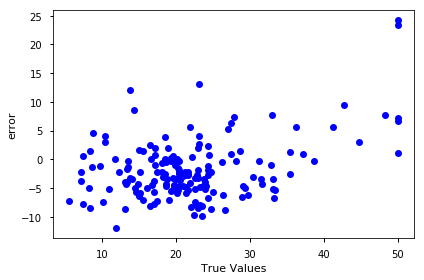

In [27]:
# caluclate the weight using OLS
weight = np.diag(1/(y_train - y_predict_reg)**2)

start_t = time.time()

# With indentity matrix as the weight
net = WEN(step_size = 1e-4, max_iter = 20000, 
           l1 = 0.1, l2 = 0.1, tol= 1e-3, 
           method = 'coordinate_descent',
            weight = weight)
net.fit(X_train, y_train)
y_predict = net.predict(X_test)
print('Time to fit and predict:', time.time()- start_t)

# calcualte the score
MSE = mse(y_test,y_predict)
R2 = net.score(X_test, y_test)
print('MSE:', MSE, '\n', 'R2:', R2)

# plot the results
plot_dims = (6, 4)
fig, ax = plt.subplots(figsize=plot_dims)
plt.plot(y_test, y_predict, 'ro')
ax.set_ylabel('Predictions')
ax.set_xlabel('True Values')
plt.tight_layout()
plt.show() 
plt.close()

# print the number of iterations and the best coeff found
print('iterations:', net._n_iter)
print('The best coeff:', net._best_coeff)

# plot the error
plot_dims = (6, 4)
fig, ax = plt.subplots(figsize=plot_dims)
plt.plot(y_test, y_test - y_predict, 'bo')
ax.set_ylabel('error')
ax.set_xlabel('True Values')
plt.tight_layout()
plt.show() 
plt.close()

## GridSearch

In [28]:
from sklearn.model_selection import GridSearchCV

net = WEN(tol = 1e-3, step_size=2e-5, max_iter=1e4)

params = {'l1': np.linspace(0.05,1,10), 'l2': np.linspace(0.05,1,10)}
gs = GridSearchCV(estimator = net, param_grid = params)
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=WEN(fit_intercept=True, l1=0.5, l2=0.5, max_iter=10000.0,
  method='coordinate_descent', random_state=0, step_size=2e-05, tol=0.001,
  weight=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'l1': array([ 0.05   ,  0.15556,  0.26111,  0.36667,  0.47222,  0.57778,
        0.68333,  0.78889,  0.89444,  1.     ]), 'l2': array([ 0.05   ,  0.15556,  0.26111,  0.36667,  0.47222,  0.57778,
        0.68333,  0.78889,  0.89444,  1.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [40]:
mts = gs.cv_results_['mean_test_score']
param_list = gs.cv_results_['params']
rank = gs.cv_results_['rank_test_score']

sorter = np.argsort(-mts)

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100,   9,  19,  29,
        39,  49,  59,  69,  79,  89,  99,   8,  18,  28,  38,  48,  58,
        68,  78,  88,  98,   7,  17,  27,  37,  47,  57,  67,  77,  87,
        97,   6,  16,  26,  36,  46,  56,  66,  76,  86,  96,   5,  15,
        25,  35,  45,  55,  65,  75,  85,  95,   4,  14,  24,  34,  44,
        54,  64,  74,  84,  94,   3,  13,  23,  33,  43,  53,  63,  73,
        83,  93,   2,  12,  22,  32,  42,  52,  62,  72,  82,  92,   1,
        11,  21,  31,  41,  51,  61,  71,  81,  91])

In [43]:
sorted_param_list = [param_list[i] for i in sorter]

print('Top 5 parameters:', sorted_param_list[:5])

print('Top 5 mts:', mts[sorter[:5]])

Top 5 parameters: [{'l1': 1.0, 'l2': 0.050000000000000003}, {'l1': 0.89444444444444449, 'l2': 0.050000000000000003}, {'l1': 0.78888888888888897, 'l2': 0.050000000000000003}, {'l1': 0.68333333333333335, 'l2': 0.050000000000000003}, {'l1': 0.57777777777777783, 'l2': 0.050000000000000003}]
Top 5 mts: [ 0.69833964  0.6982782   0.69821417  0.69814577  0.69807526]
